# Association Rule - Stratification (Gender)

In [55]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import matplotlib.pyplot as plt

In [56]:
basket=pd.read_csv('Inpatient.csv')
basket

,DESYNPUF_ID,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10
0,00013D2EFD8E45D1,7802,78820,V4501,4280,2720,4019,V4502,73300,E9330,NaN
1,00016F745862898F,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN
2,00016F745862898F,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00016F745862898F,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN
4,00016F745862898F,3569,4019,3542,V8801,78820,2639,7840,7856,4271,NaN
...,...,...,...,...,...,...,...,...,...,...,...
66768,FFF8B49458F9FFA7,4871,41400,27651,60000,40390,3659,NaN,NaN,NaN,NaN
66769,FFF8B49458F9FFA7,9694,2989,9663,58881,2859,5790,NaN,NaN,NaN,NaN
66770,FFFA950301FCA748,1985,3694,25000,73300,33829,4168,2859,28522,NaN,NaN
66771,FFFC880E13CA6278,1519,1977,70725,2724,5723,2639,E969,5070,7830,NaN


In [57]:
# Because the inpatient dataset contains 2008-2010 data, we imported all 2008-2010 beneficiary data

#2008 data
df_beneficiary_2008=pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv')
beneficiary_2008=df_beneficiary_2008[['DESYNPUF_ID','BENE_SEX_IDENT_CD']]
beneficiary_2008_male=beneficiary_2008[beneficiary_2008['BENE_SEX_IDENT_CD']==1]
beneficiary_2008_female=beneficiary_2008[beneficiary_2008['BENE_SEX_IDENT_CD']==2]


#2009 data
df_beneficiary_2009=pd.read_csv('DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv')
beneficiary_2009=df_beneficiary_2009[['DESYNPUF_ID','BENE_SEX_IDENT_CD']]
beneficiary_2009_male=beneficiary_2009[beneficiary_2009['BENE_SEX_IDENT_CD']==1]
beneficiary_2009_female=beneficiary_2009[beneficiary_2009['BENE_SEX_IDENT_CD']==2]

#2010 data
df_beneficiary_2010=pd.read_csv('DE1_0_2010_Beneficiary_Summary_File_Sample_1.csv')
beneficiary_2010=df_beneficiary_2010[['DESYNPUF_ID','BENE_SEX_IDENT_CD']]
beneficiary_2010_male=beneficiary_2010[beneficiary_2010['BENE_SEX_IDENT_CD']==1]
beneficiary_2010_female=beneficiary_2010[beneficiary_2010['BENE_SEX_IDENT_CD']==2]


In [58]:
# Concat: 2008-2010 female
female_df=pd.concat([beneficiary_2008_female, beneficiary_2009_female, beneficiary_2010_female])
# Merge with inpatient data:
female_inpatient=pd.merge(basket, female_df, on='DESYNPUF_ID')
# drop duplcated rows:
female_inpatient=female_inpatient.drop_duplicates()
female_inpatient=female_inpatient.drop(['BENE_SEX_IDENT_CD'], axis=1)


# Concat: 2008-2010 male
male_df=pd.concat([beneficiary_2008_male, beneficiary_2009_male, beneficiary_2010_male])
# Merge with inpatient data:
male_inpatient=pd.merge(basket, male_df, on='DESYNPUF_ID')
# drop duplcated rows:
male_inpatient=male_inpatient.drop_duplicates()
male_inpatient=male_inpatient.drop(['BENE_SEX_IDENT_CD'], axis=1)

# Data preprocessing: female

In [59]:
# Get df
mycolumns_f = female_inpatient.columns
mycolumns_f[1:]

# Concat df
new_female_basket = female_inpatient.iloc[:,1]
for i in mycolumns_f[2:]:
    new_female_basket = pd.concat([new_female_basket,female_inpatient.loc[:,i]])

# Get rid of NaN/V/E values
filter1 = (new_female_basket.str.isnumeric() == True)
new_female_basket = new_female_basket[filter1]

# Extract first 3 numbers (level 2)
new_female_basket.astype(str)
new_female_basket_2 = new_female_basket.str[:3]

# convert it to dataframe, with column name being 'DGNS_CD_level_2'
mypd_female_2 = pd.DataFrame(new_female_basket_2, columns = ['DGNS_CD_level_2'])
mypd_female_3= pd.DataFrame(new_female_basket, columns=['DGNS_CD_level_3'])

mypd_female=pd.concat([mypd_female_2, mypd_female_3], axis=1)
mypd_female

,DGNS_CD_level_2,DGNS_CD_level_3
0,338,33811
3,491,49121
9,736,7366
12,434,43411
15,491,49121
...,...,...
112488,250,25000
112536,287,2875
112572,428,4280
112584,272,2724


#  <font color='red'>female</font>
# Level 2

In [91]:
mypd_female["Count"] = 1
AR_basket_female = mypd_female.pivot_table(index = mypd_female.index, columns="DGNS_CD_level_2", values="Count", aggfunc="sum", fill_value = 0)


AR_basket_female[AR_basket_female>0] = 1
AR_basket_female

DGNS_CD_level_2,110,111,112,114,115,116,117,119,130,131,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Mine the most frequent itemsets with minimal support of 0.05
frequent_itemsets_f = apriori(AR_basket_female, min_support=0.05, use_colnames=True)
frequent_itemsets_f.sort_values(by= 'support', ascending=False).head()


,support,itemsets
10,0.359865,(401)
12,0.254436,(414)
3,0.251412,(276)
1,0.251333,(250)
13,0.229823,(427)
2,0.226719,(272)
14,0.222688,(428)
5,0.150996,(285)
23,0.139830,(599)
20,0.138530,(530)


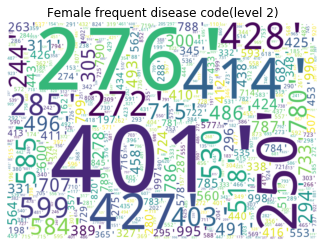

In [62]:
# Generate Wordcloud : Female
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# convert it to list and str
female_freq_disease=mypd_female['DGNS_CD_level_2'].to_list()
female_freq_disease= "'" + "','".join(map(str, female_freq_disease)) + "'"
female_freq_disease

# plot
wordcloud1 = WordCloud(max_font_size=300, 
                       max_words=500,
                       background_color="white",
                       width = 1000, 
                       height = 700).generate(female_freq_disease)
plt.figure()
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title("Female frequent disease code(level 2)")
plt.show()

In [63]:
# by support: female
rules_f = association_rules(frequent_itemsets_f, metric="support", min_threshold=0.05)
rules_f.sort_values(by = "support", ascending = False).head()

42

In [64]:
# by support: female
rules_f = association_rules(frequent_itemsets_f, metric="support", min_threshold=0.05)
rules_f.sort_values(by = "support", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(414),(401),0.254436,0.359865,0.094528,0.371521,1.032389,0.002966,1.018546
28,(401),(414),0.359865,0.254436,0.094528,0.262677,1.032389,0.002966,1.011177
12,(401),(272),0.359865,0.226719,0.090682,0.251990,1.111462,0.009094,1.033784
13,(272),(401),0.226719,0.359865,0.090682,0.399977,1.111462,0.009094,1.066850
4,(401),(250),0.359865,0.251333,0.089622,0.249042,0.990885,-0.000824,0.996949


In [65]:
# by confidence: female
rules_f = association_rules(frequent_itemsets_f, metric="confidence", min_threshold=0.05)
rules_f.sort_values(by = "confidence", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(272),(401),0.226719,0.359865,0.090682,0.399977,1.111462,0.009094,1.066850
34,(530),(401),0.138530,0.359865,0.053736,0.387900,1.077903,0.003884,1.045800
29,(414),(401),0.254436,0.359865,0.094528,0.371521,1.032389,0.002966,1.018546
31,(427),(401),0.229823,0.359865,0.082513,0.359031,0.997681,-0.000192,0.998698
5,(250),(401),0.251333,0.359865,0.089622,0.356585,0.990885,-0.000824,0.994902


In [66]:
# by lift: female
rules_f = association_rules(frequent_itemsets_f, metric="lift", min_threshold=0.05)
rules_f.sort_values(by = "lift", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(428),(427),0.222688,0.229823,0.065671,0.294902,1.283174,0.014492,1.092299
40,(427),(428),0.229823,0.222688,0.065671,0.285747,1.283174,0.014492,1.088287
39,(414),(428),0.254436,0.222688,0.067316,0.264568,1.188066,0.010656,1.056946
38,(428),(414),0.222688,0.254436,0.067316,0.302287,1.188066,0.010656,1.068582
15,(414),(272),0.254436,0.226719,0.065459,0.257271,1.134755,0.007773,1.041134


# female level 3

In [67]:
mypd_female["Count"] = 1
AR_basket_female = mypd_female.pivot_table(index = mypd_female.index, columns="DGNS_CD_level_3", values="Count", aggfunc="sum", fill_value = 0)

AR_basket_female[AR_basket_female>0] = 1

In [68]:
# Mine the most frequent itemsets with minimal support of 0.05
frequent_itemsets_f = apriori(AR_basket_female, min_support=0.05, use_colnames=True)
frequent_itemsets_f.sort_values(by= 'support', ascending=False).head(10)

,support,itemsets
10,0.351298,(4019)
1,0.182267,(25000)
3,0.177042,(2724)
13,0.156407,(41401)
15,0.153648,(4280)
14,0.153330,(42731)
22,0.130016,(5990)
19,0.121343,(53081)
0,0.105164,(2449)
18,0.099700,(496)


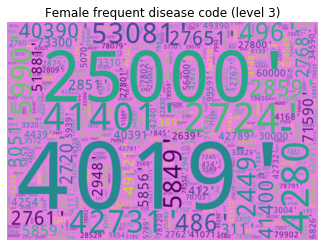

In [69]:
# Generate Wordcloud : Female
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# convert it to list and str
female_freq_disease=mypd_female['DGNS_CD_level_3'].to_list()
female_freq_disease= "'" + "','".join(map(str, female_freq_disease)) + "'"
female_freq_disease

# plot
wordcloud1 = WordCloud(max_font_size=300, 
                       max_words=500,
                       background_color="#e681e3",
                       width = 1000, 
                       height = 700).generate(female_freq_disease)
plt.figure()
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title("Female frequent disease code (level 3)")
plt.show()

In [70]:
# by support: female 
rules_f = association_rules(frequent_itemsets_f, metric="support", min_threshold=0.05)
rules_f.sort_values(by = "support", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(4019),(2724),0.351298,0.177042,0.069862,0.198867,1.123281,0.007667,1.027244
3,(2724),(4019),0.177042,0.351298,0.069862,0.394607,1.123281,0.007667,1.071538
0,(4019),(25000),0.351298,0.182267,0.067342,0.191695,1.051728,0.003312,1.011664
1,(25000),(4019),0.182267,0.351298,0.067342,0.369470,1.051728,0.003312,1.028820
4,(4019),(41401),0.351298,0.156407,0.058404,0.166251,1.062943,0.003458,1.011808


In [71]:
# by confidence: female 
rules_f = association_rules(frequent_itemsets_f, metric="confidence", min_threshold=0.05)
rules_f.sort_values(by = "confidence", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(2724),(4019),0.177042,0.351298,0.069862,0.394607,1.123281,0.007667,1.071538
5,(41401),(4019),0.156407,0.351298,0.058404,0.373410,1.062943,0.003458,1.035289
1,(25000),(4019),0.182267,0.351298,0.067342,0.369470,1.051728,0.003312,1.028820
7,(42731),(4019),0.153330,0.351298,0.054160,0.353226,1.005488,0.000296,1.002981
2,(4019),(2724),0.351298,0.177042,0.069862,0.198867,1.123281,0.007667,1.027244


In [72]:
# by lift: female 
rules_f = association_rules(frequent_itemsets_f, metric="lift", min_threshold=0.05)
rules_f.sort_values(by = "lift", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(4019),(2724),0.351298,0.177042,0.069862,0.198867,1.123281,0.007667,1.027244
3,(2724),(4019),0.177042,0.351298,0.069862,0.394607,1.123281,0.007667,1.071538
4,(4019),(41401),0.351298,0.156407,0.058404,0.166251,1.062943,0.003458,1.011808
5,(41401),(4019),0.156407,0.351298,0.058404,0.373410,1.062943,0.003458,1.035289
0,(4019),(25000),0.351298,0.182267,0.067342,0.191695,1.051728,0.003312,1.011664


#  <font color='red'>AR mining: male </font>
# level 2

In [87]:
# Get df
mycolumns_m = male_inpatient.columns
mycolumns_m[1:]

# Concat df
new_male_basket = male_inpatient.iloc[:,1]
for i in mycolumns_f[2:]:
    new_male_basket = pd.concat([new_male_basket,male_inpatient.loc[:,i]])

# Get rid of NaN/V/E values
filter1 = (new_male_basket.str.isnumeric() == True)
new_male_basket = new_male_basket[filter1]

# Extract first 3 numbers (level 2)
new_male_basket.astype(str)
new_male_basket_2 = new_male_basket.str[:3]

# convert it to dataframe, with column name being 'DGNS_CD_level_2'
mypd_male_2 = pd.DataFrame(new_male_basket_2, columns = ['DGNS_CD_level_2'])
mypd_male_3= pd.DataFrame(new_male_basket, columns=['DGNS_CD_level_3'])

mypd_male=pd.concat([mypd_male_2, mypd_male_3], axis=1)
mypd_male


mypd_male["Count"] = 1
AR_basket_male = mypd_male.pivot_table(index = mypd_male.index, columns="DGNS_CD_level_2", values="Count", aggfunc="sum", fill_value = 0)


AR_basket_male[AR_basket_male>0] = 1


In [89]:
# Mine the most frequent itemsets with minimal support of 0.05
frequent_itemsets_m = apriori(AR_basket_male, min_support=0.05, use_colnames=True)
frequent_itemsets_m.sort_values(by= 'support', ascending=False)


,support,itemsets
10,0.360856,(401)
12,0.255437,(414)
3,0.246151,(276)
1,0.242803,(250)
2,0.231653,(272)
13,0.227408,(427)
14,0.221885,(428)
5,0.156645,(285)
23,0.144529,(599)
20,0.137314,(530)


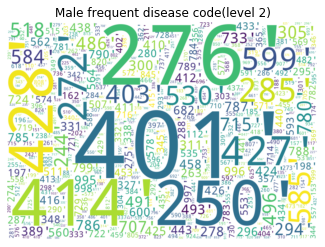

In [75]:
# Generate Wordcloud: Male

male_freq_disease=mypd_male['DGNS_CD_level_2'].to_list()
male_freq_disease= "'" + "','".join(map(str, male_freq_disease)) + "'"
male_freq_disease

wordcloud1 = WordCloud(max_font_size=300, 
                       max_words=500,
                       background_color="white",
                       width = 1000, 
                       height = 700).generate(male_freq_disease)
plt.figure()
plt.imshow(wordcloud1,interpolation="bilinear")
plt.axis("off")
plt.title("Male frequent disease code(level 2)")
plt.show()

In [76]:
# by support: male
rules_m = association_rules(frequent_itemsets_m, metric="support", min_threshold=0.05)
rules_m.sort_values(by = "support", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(401),(414),0.360856,0.255437,0.097169,0.269275,1.054175,0.004994,1.018938
29,(414),(401),0.255437,0.360856,0.097169,0.380405,1.054175,0.004994,1.031552
13,(272),(401),0.231653,0.360856,0.092371,0.398748,1.105007,0.008778,1.063022
12,(401),(272),0.360856,0.231653,0.092371,0.255979,1.105007,0.008778,1.032694
4,(401),(250),0.360856,0.242803,0.087470,0.242395,0.998321,-0.000147,0.999462


In [77]:
# by confidence: male
rules_m = association_rules(frequent_itemsets_m, metric="confidence", min_threshold=0.05)
rules_m.sort_values(by = "confidence", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(272),(401),0.231653,0.360856,0.092371,0.398748,1.105007,0.008778,1.063022
34,(530),(401),0.137314,0.360856,0.052606,0.383107,1.061662,0.003055,1.036070
29,(414),(401),0.255437,0.360856,0.097169,0.380405,1.054175,0.004994,1.031552
5,(250),(401),0.242803,0.360856,0.087470,0.360250,0.998321,-0.000147,0.999053
31,(427),(401),0.227408,0.360856,0.081360,0.357772,0.991453,-0.000701,0.995197


In [78]:
# by lift: male
rules_m = association_rules(frequent_itemsets_m, metric="lift", min_threshold=0.05)
rules_m.sort_values(by = "lift", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,(427),(428),0.227408,0.221885,0.064204,0.282332,1.272424,0.013746,1.084227
41,(428),(427),0.221885,0.227408,0.064204,0.289359,1.272424,0.013746,1.087177
15,(414),(272),0.255437,0.231653,0.067415,0.263919,1.139283,0.008242,1.043834
14,(272),(414),0.231653,0.255437,0.067415,0.291015,1.139283,0.008242,1.050182
37,(414),(427),0.255437,0.227408,0.066103,0.258784,1.137973,0.008015,1.042331


# Male Level 3

In [79]:
AR_basket_male = mypd_male.pivot_table(index = mypd_male.index, columns="DGNS_CD_level_3", values="Count", aggfunc="sum", fill_value = 0)
AR_basket_male[AR_basket_male>0] = 1

In [80]:
# frequent itemsets
frequent_itemsets_m = apriori(AR_basket_male, min_support=0.05, use_colnames=True)
frequent_itemsets_m.sort_values(by= 'support', ascending=False).head(10)

,support,itemsets
10,0.354125,(4019)
3,0.180186,(2724)
1,0.176458,(25000)
13,0.156990,(41401)
15,0.152606,(4280)
14,0.149810,(42731)
22,0.134553,(5990)
19,0.120849,(53081)
0,0.103072,(2449)
18,0.098585,(496)


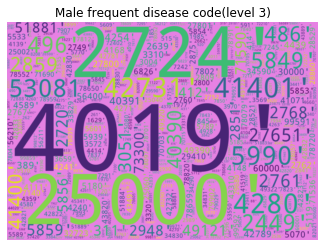

In [81]:
# Generate Wordcloud: Male

male_freq_disease=mypd_male['DGNS_CD_level_3'].to_list()
male_freq_disease= "'" + "','".join(map(str, male_freq_disease)) + "'"
male_freq_disease

wordcloud1 = WordCloud(max_font_size=300, 
                       max_words=500,
                       background_color="#e681e3",
                       width = 1000, 
                       height = 700).generate(male_freq_disease)
plt.figure()
plt.imshow(wordcloud1,interpolation="bilinear")
plt.axis("off")
plt.title("Male frequent disease code(level 3)")
plt.show()

In [82]:
# Male level 3 support
rules_m = association_rules(frequent_itemsets_m, metric="support", min_threshold=0.05)
rules_m.sort_values(by = "support", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(4019),(2724),0.354125,0.180186,0.070245,0.198362,1.100873,0.006437,1.022674
3,(2724),(4019),0.180186,0.354125,0.070245,0.389847,1.100873,0.006437,1.058546
0,(4019),(25000),0.354125,0.176458,0.065205,0.184131,1.043481,0.002717,1.009404
1,(25000),(4019),0.176458,0.354125,0.065205,0.369523,1.043481,0.002717,1.024422
4,(4019),(41401),0.354125,0.156990,0.060511,0.170874,1.088441,0.004917,1.016746


In [83]:
# Male level 3 confidence
rules_m = association_rules(frequent_itemsets_m, metric="confidence", min_threshold=0.05)
rules_m.sort_values(by = "confidence", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(2724),(4019),0.180186,0.354125,0.070245,0.389847,1.100873,0.006437,1.058546
5,(41401),(4019),0.156990,0.354125,0.060511,0.385444,1.088441,0.004917,1.050962
1,(25000),(4019),0.176458,0.354125,0.065205,0.369523,1.043481,0.002717,1.024422
7,(42731),(4019),0.149810,0.354125,0.052330,0.349309,0.986400,-0.000722,0.992598
2,(4019),(2724),0.354125,0.180186,0.070245,0.198362,1.100873,0.006437,1.022674


In [84]:
# Male level 3 lift
rules_m = association_rules(frequent_itemsets_m, metric="lift", min_threshold=0.05)
rules_m.sort_values(by = "lift", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(4019),(2724),0.354125,0.180186,0.070245,0.198362,1.100873,0.006437,1.022674
3,(2724),(4019),0.180186,0.354125,0.070245,0.389847,1.100873,0.006437,1.058546
4,(4019),(41401),0.354125,0.156990,0.060511,0.170874,1.088441,0.004917,1.016746
5,(41401),(4019),0.156990,0.354125,0.060511,0.385444,1.088441,0.004917,1.050962
0,(4019),(25000),0.354125,0.176458,0.065205,0.184131,1.043481,0.002717,1.009404
